# Visualizing COVID-19 Data

Data has been provided in the Github repository: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv

## Visualization 1

In [50]:
# Loading Libraries 
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker


In [26]:
# Loading and Selecting Data
df = pd.read_csv("Q:\Reporting\Decision Support Q drive\Learning Material\covid19countries-aggregated.csv", 
                 parse_dates=['Date'])

In [27]:
df.head(5)

Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-22      Albania          0          0       0
2 2020-01-22      Algeria          0          0       0
3 2020-01-22      Andorra          0          0       0
4 2020-01-22       Angola          0          0       0

In [28]:
# There are quite a lot of countries listed here. Let's only focus on a few countries for now.
# Selecting the data makes the resulting visualization a little more readable.
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [29]:
countries = ['Canada','Germany','United Kingdom','US','France','China']
df = df[df['Country'].isin(countries)]

In [30]:
# Creating a Summary Column
df['Cases'] = df[['Confirmed','Recovered','Deaths']].sum(axis=1)

### Let’s prepare two further dataframes that will hold our data in crosstabs, which will allow us to more easily visualize the data.

In [31]:
# Restructuring the Data - pivot dataframe df, creating columns out of countries, with the number of cases as the data fields. 
# This new dataframe is called covid. We then set the index of the dataframe to be the date and 
# assign the country names to column headers.
df = df.pivot(index='Date', columns = 'Country', values='Cases') 
countries = list(df.columns) 
covid = df.reset_index('Date') 
covid.set_index(['Date'], inplace=True)
covid.columns = countries

In [32]:
# Calculating Rates per 100,000 - we copy dataframe covid and call it percapita. 
# We use a dictionary that is storing all our countries’ populations and divide each value by the population 
# and multiply it by 100,000 to generate a number of cases per 100,000 people.
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 
              'US': 330548815, 'France': 65239883, 'China':1438027228}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

### This is how the main data tables look like. Now we can begin visualizations on these 2 tables!

In [88]:
covid

Canada   China  France  Germany       US  United Kingdom
Date                                                                
2020-01-22       0     593       0        0        1               0
2020-01-23       0     691       0        0        1               0
2020-01-24       0     982       2        0        2               0
2020-01-25       0    1487       3        0        2               0
2020-01-26       1    2180       3        0        5               0
...            ...     ...     ...      ...      ...             ...
2020-08-14  242330  176871  364058   433461  7278030          361114
2020-08-15  242830  177090  367368   434479  7349173          362164
2020-08-16  243280  177278  367368   435429  7406332          363280
2020-08-17  243726  177427  371181   438185  7474402          364008
2020-08-18  245266  177607  371182   441038  7552396          365136

[210 rows x 6 columns]

In [90]:
percapita

Canada      China      France     Germany           US  \
Date                                                                     
2020-01-22    0.000000   0.041237    0.000000    0.000000     0.000303   
2020-01-23    0.000000   0.048052    0.000000    0.000000     0.000303   
2020-01-24    0.000000   0.068288    0.003066    0.000000     0.000605   
2020-01-25    0.000000   0.103406    0.004598    0.000000     0.000605   
2020-01-26    0.002655   0.151597    0.004598    0.000000     0.001513   
...                ...        ...         ...         ...          ...   
2020-08-14  643.390701  12.299558  558.029817  517.741585  2201.801873   
2020-08-15  644.718211  12.314788  563.103401  518.957521  2223.324564   
2020-08-16  645.912969  12.327861  563.103401  520.092235  2240.616715   
2020-08-17  647.097107  12.338223  568.947985  523.384102  2261.209740   
2020-08-18  651.185836  12.350740  568.949518  526.791829  2284.805045   

            United Kingdom  
Date                        
2020-01-22        0.000000  
2020-01-23        0.000000  
2020-01-24        0.000000  
2020-01-25        0.000000  
2020-01-26        0.000000  
...                    ...  
2020-08-14      532.595388  
2020-08-15      534.143999  
2020-08-16      535.789952  
2020-08-17      536.863655  
2020-08-18      538.527306  

[210 rows x 6 columns]

### Let’s begin by creating our first visualization that will demonstrate the number of total cases over time in various countries:

Text(2020-01-23 00:00:00, -1800000, 'datagy.io                     Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

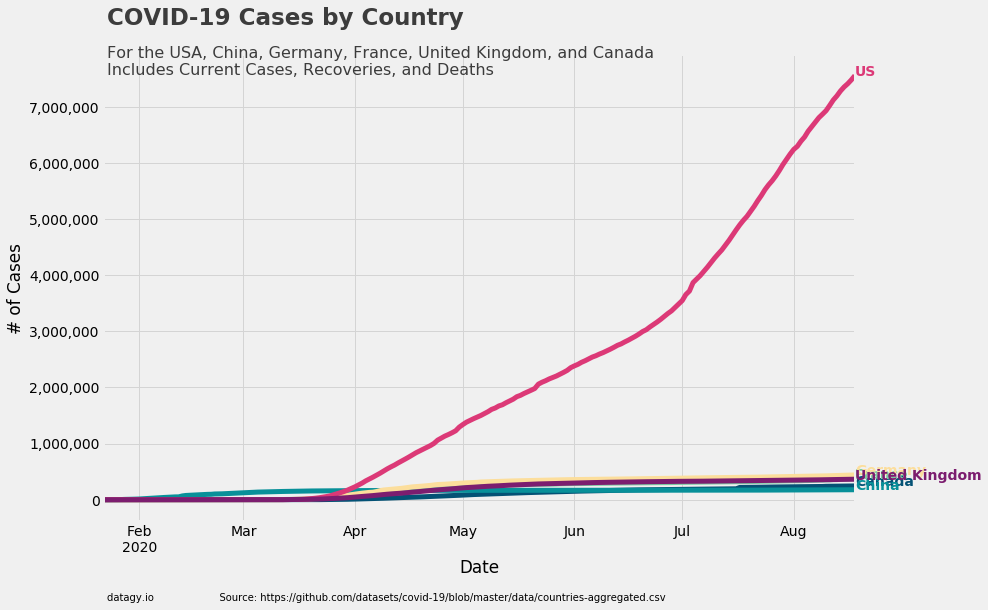

In [83]:
# Generating Colours and Style - we created a dictionary that contains hex values for different countries. 
# Storing this in a dictionary will allow us to easily call it later in a for-loop. 
# We also assign the FiveThirtyEight style to add some general formatting, which we’ll heavily build upon.
colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 
          'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Creating the Visualization - we create our first visualization using Pandas’ plot function. 
# We use the colors parameter to assign the colors to different columns. 
# We also use the set_major_formatter method to format values with separators for thousands.
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Assigning Colour - we create a for-loop that generates label text for the various countries. 
# This for-loop gets each country’s name from the keys in the dictionary in the form of a list and iterates over this list. 
# It places text containing the country’s name to the right of the last x-value 
# (covid.index[-1] → the last date in the dataframe), 
# at the current day’s y-value (which will always be equal to the max value of that column).
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], 
              y = covid[country].max(), 
              color = colors[country], 
              s = country, 
              weight = 'bold')
    
# Adding Labels - we add a title, subtitle, and source information about the chart. 
# We use variables again to position the data so as the graph updates these positions are updated dynamically!
plot.text(x = covid.index[1], 
          y = int(covid.max().max())+904500, 
          s = "COVID-19 Cases by Country", 
          fontsize = 23, 
          weight = 'bold', 
          alpha = .75)

plot.text(x = covid.index[1], 
          y = int(covid.max().max())+15000, 
          s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", 
          fontsize = 16, 
          alpha = .75)

plot.text(x = percapita.index[1], 
          y = -1800000,
          s = 'datagy.io                     Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', 
          fontsize = 10)


## Visualization 2

Text(2020-01-23 00:00:00, -555, 'datagy.io                         Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

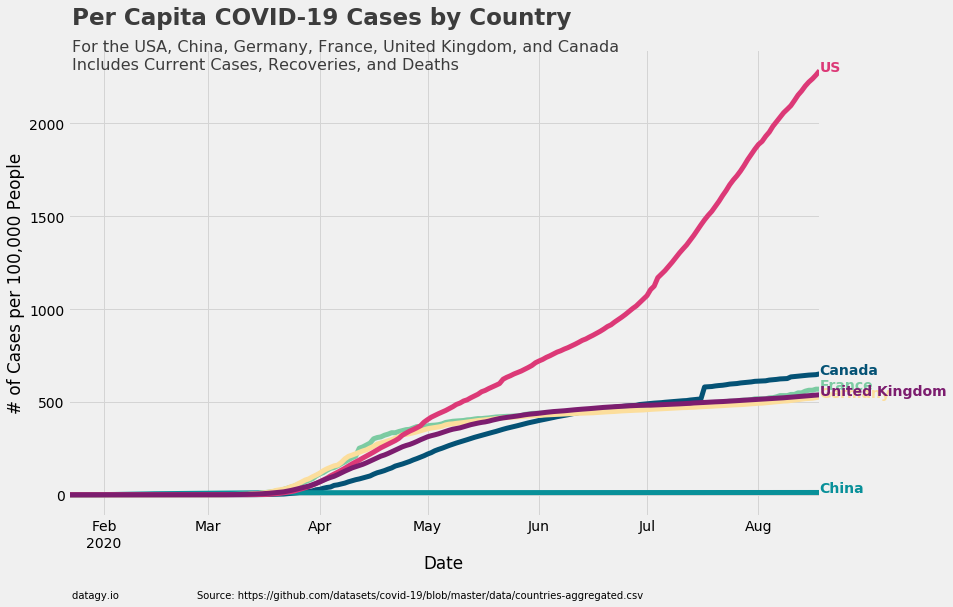

In [82]:
# This section follows mostly what we did for our first graph. 
# This goes to show how simple it is to update visualizations for different datasets once you’ve set up a chart using Python!

percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')

for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], 
                       y = percapita[country].max(), 
                       color = colors[country], 
                       s = country, 
                       weight = 'bold')

percapitaplot.text(x = percapita.index[1], 
                   y = percapita.max().max()+250, 
                   s = "Per Capita COVID-19 Cases by Country", 
                   fontsize = 23, 
                   weight = 'bold', 
                   alpha = .75)

percapitaplot.text(x = percapita.index[1], 
                   y = percapita.max().max()+10, 
                   s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", 
                   fontsize = 16, 
                   alpha = .75)

percapitaplot.text(x = percapita.index[1], 
                   y = -555,
                   s = 'datagy.io                         Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', 
                   fontsize = 10)
